<a href="https://colab.research.google.com/github/Bhanukoya/Masters-Project/blob/master/CTE_Prediction_Dataset_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df  = pd.read_excel('/content/drive/My Drive/Meng Project/Whole_A_datset.xlsx')
df.head()

,Mix No,Mix Types,Cement Source,Supplementary Cementitious Material (SCM),Fine Aggregate Type,Coarse Aggregate,Air Entraining Admixture (AEA) (mL),Air Content (%),Slump (in),Water-to-Cement Ratio (WCM),Water Reducing Admixture (WRA) (mL),Modulus of Rupture (PSI) (7 Days),Modulus of Rupture (PSI) (14 Days),Modulus of Rupture (PSI) (28 Days),Modulus of Rupture (PSI) (90 Days),CTE (mm/mm/0C) (28 Days)
0,1,A,Source 1,None,Sand A (igneous),Glacial Granite,12.0,6.0,2.25,0.4,50,606,684,676,817,0.000009
1,2,A,Source 1,None,Sand A (igneous),Glacial Granite,11.0,6.2,2.75,0.4,65,623,605,675,829,0.000010
2,3,A,Source 1,None,Sand A (igneous),Glacial Granite,12.0,4.3,1.25,0.4,60,644,665,758,816,0.000009
3,4,A,Source 1,None,Sand A (igneous),Glacial Granite,11.0,5.7,2.75,0.4,60,613,630,682,734,0.000009
4,5,A,Source 1,None,Sand A (igneous),Glacial Granite,9.0,5.1,1.50,0.4,120,631,688,782,904,0.000010


In [3]:
df.shape

(110, 16)

### data pre-processing

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 16 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Mix No                                     110 non-null    int64  
 1   Mix Types                                  110 non-null    object 
 2   Cement Source                              110 non-null    object 
 3   Supplementary Cementitious Material (SCM)  110 non-null    object 
 4   Fine Aggregate Type                        110 non-null    object 
 5   Coarse Aggregate                           110 non-null    object 
 6   Air Entraining Admixture (AEA) (mL)        110 non-null    float64
 7   Air Content (%)                            110 non-null    float64
 8   Slump (in)                                 110 non-null    float64
 9   Water-to-Cement Ratio (WCM)                110 non-null    float64
 10  Water Reducing Admixture (

In [5]:
df.isna().sum()

Mix No                                       0
Mix Types                                    0
Cement Source                                0
Supplementary Cementitious Material (SCM)    0
Fine Aggregate Type                          0
Coarse Aggregate                             0
Air Entraining Admixture (AEA) (mL)          0
Air Content (%)                              0
Slump (in)                                   0
Water-to-Cement Ratio (WCM)                  0
Water Reducing Admixture (WRA) (mL)          0
Modulus of Rupture (PSI) (7 Days)            0
Modulus of Rupture (PSI) (14 Days)           0
Modulus of Rupture (PSI) (28 Days)           0
Modulus of Rupture (PSI) (90 Days)           0
CTE (mm/mm/0C) (28 Days)                     0
dtype: int64

In [6]:
df.dtypes

Mix No                                         int64
Mix Types                                     object
Cement Source                                 object
Supplementary Cementitious Material (SCM)     object
Fine Aggregate Type                           object
Coarse Aggregate                              object
Air Entraining Admixture (AEA) (mL)          float64
Air Content (%)                              float64
Slump (in)                                   float64
Water-to-Cement Ratio (WCM)                  float64
Water Reducing Admixture (WRA) (mL)            int64
Modulus of Rupture (PSI) (7 Days)              int64
Modulus of Rupture (PSI) (14 Days)             int64
Modulus of Rupture (PSI) (28 Days)             int64
Modulus of Rupture (PSI) (90 Days)             int64
CTE (mm/mm/0C) (28 Days)                     float64
dtype: object

## Dataset Analysis

In [7]:
df.describe()

,Mix No,Air Entraining Admixture (AEA) (mL),Air Content (%),Slump (in),Water-to-Cement Ratio (WCM),Water Reducing Admixture (WRA) (mL),Modulus of Rupture (PSI) (7 Days),Modulus of Rupture (PSI) (14 Days),Modulus of Rupture (PSI) (28 Days),Modulus of Rupture (PSI) (90 Days),CTE (mm/mm/0C) (28 Days)
count,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,1.100000e+02
mean,55.500000,16.431818,5.240909,2.413636,0.387636,31.336364,662.809091,719.190909,781.545455,874.672727,9.472336e-06
std,31.898276,4.839856,0.674475,0.561000,0.017916,37.958277,65.716586,76.224619,72.508606,71.980516,4.505294e-07
min,1.000000,8.000000,3.400000,1.000000,0.330000,0.000000,508.000000,575.000000,623.000000,721.000000,8.492000e-06
25%,28.250000,12.000000,4.725000,2.000000,0.380000,0.000000,613.000000,663.500000,727.250000,826.750000,9.334000e-06
50%,55.500000,16.000000,5.300000,2.500000,0.400000,10.000000,662.000000,706.500000,781.500000,877.000000,9.508000e-06
75%,82.750000,20.000000,5.775000,3.000000,0.400000,60.000000,703.000000,769.500000,824.750000,922.000000,9.674250e-06
max,110.000000,31.000000,6.600000,3.000000,0.400000,125.000000,849.000000,942.000000,972.000000,1080.000000,1.098400e-05


### Analysis of Feature variables

In [8]:
import scipy
from scipy import stats

sns.set(style='whitegrid')

In [9]:
# Function to find number of ouliers and to draw feature plots

def Feature_analysis(x):


  Q1 = df[x].quantile(q=0.25)
  Q3 = df[x].quantile(q=0.75)
  IQR = stats.iqr(df[x])

  print('1st Quartile of ' + x + ' :' , Q1)
  print('3rd Quartile of ' + x + ' :', Q3)
  print('Inter Quartile range of ' + x + ' :', IQR, '\n')


  Lower_outlier = Q1 - 1.5*(IQR)
  upper_outlier = Q3 + 1.5*(IQR)

  print('Lower outlier value in ' + x + ' :', Lower_outlier)
  print('upper outlier value in ' + x + ' :', upper_outlier, '\n')



  print('Number of lower outliers in ' + x + ' :' ,df[df[x]<Lower_outlier][x].count())
  print('Number of upper outliers in ' + x + ' :' ,df[df[x]>upper_outlier][x].count())

  print('% of lower outliers in ' + x + ' :', round(df[df[x]<Lower_outlier][x].count()*100/len(df)))
  print('% of upper outliers in ' + x + ' :', round(df[df[x]>upper_outlier][x].count()*100/len(df)),'\n' )



  fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(16,5))

  # Distribution plot
  sns.distplot(df[x], ax=ax1)
  ax1.set_xlabel(x, fontsize=15)
  ax1.set_title('Distribution plot', fontsize=20)
  ax1.tick_params(labelsize=15)

  # Box plot
  sns.boxplot(df[x], ax=ax2, orient='v' )
  ax2.set_ylabel(x, fontsize=15)
  ax2.set_title( x +' ' + 'Box plot', fontsize=20)
  ax2.tick_params(labelsize=15)


  # Histogram
  ax3.hist(df[x])
  ax3.set_xlabel(x, fontsize = 15)
  ax3.set_title('Histogram', fontsize = 20)
  ax3.tick_params(labelsize=15)


  plt.tight_layout()

1st Quartile of Air Entraining Admixture (AEA) (mL) : 12.0
3rd Quartile of Air Entraining Admixture (AEA) (mL) : 20.0
Inter Quartile range of Air Entraining Admixture (AEA) (mL) : 8.0 

Lower outlier value in Air Entraining Admixture (AEA) (mL) : 0.0
upper outlier value in Air Entraining Admixture (AEA) (mL) : 32.0 

Number of lower outliers in Air Entraining Admixture (AEA) (mL) : 0
Number of upper outliers in Air Entraining Admixture (AEA) (mL) : 0
% of lower outliers in Air Entraining Admixture (AEA) (mL) : 0.0
% of upper outliers in Air Entraining Admixture (AEA) (mL) : 0.0 



/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


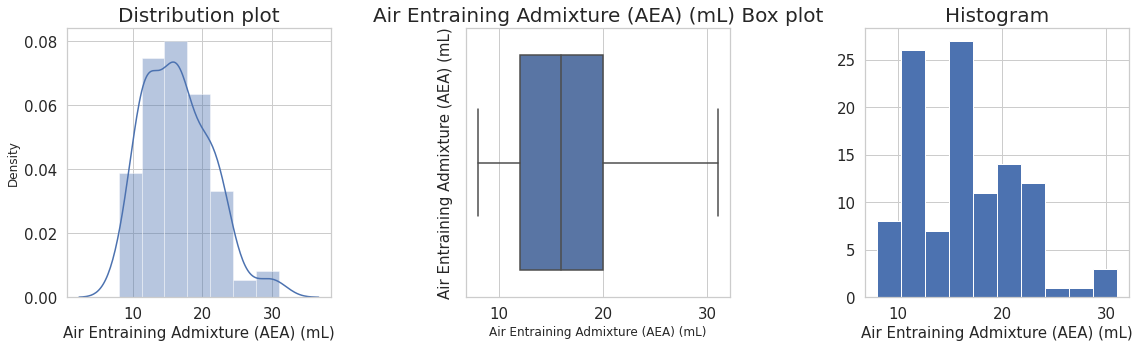

In [10]:
Feature_analysis('Air Entraining Admixture (AEA) (mL)')

1st Quartile of Air Content (%) : 4.7250000000000005
3rd Quartile of Air Content (%) : 5.7749999999999995
Inter Quartile range of Air Content (%) : 1.049999999999999 

Lower outlier value in Air Content (%) : 3.150000000000002
upper outlier value in Air Content (%) : 7.349999999999998 

Number of lower outliers in Air Content (%) : 0
Number of upper outliers in Air Content (%) : 0
% of lower outliers in Air Content (%) : 0.0
% of upper outliers in Air Content (%) : 0.0 



/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


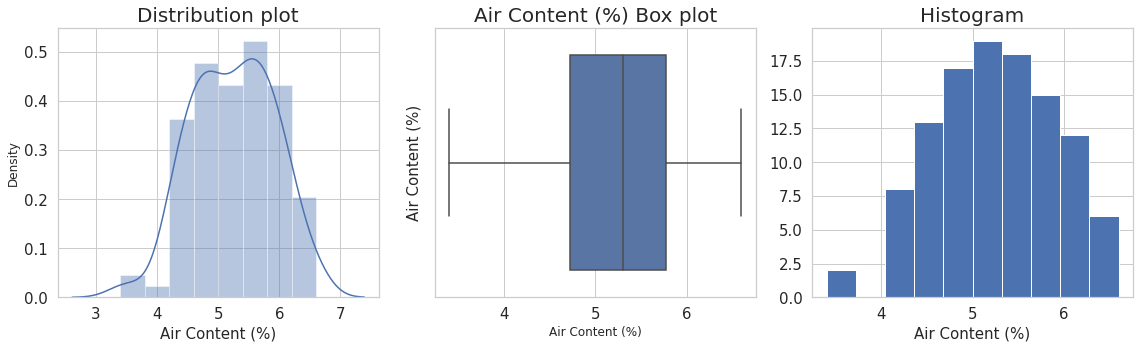

In [11]:
Feature_analysis('Air Content (%)')

1st Quartile of Slump (in) : 2.0
3rd Quartile of Slump (in) : 3.0
Inter Quartile range of Slump (in) : 1.0 

Lower outlier value in Slump (in) : 0.5
upper outlier value in Slump (in) : 4.5 

Number of lower outliers in Slump (in) : 0
Number of upper outliers in Slump (in) : 0
% of lower outliers in Slump (in) : 0.0
% of upper outliers in Slump (in) : 0.0 



/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


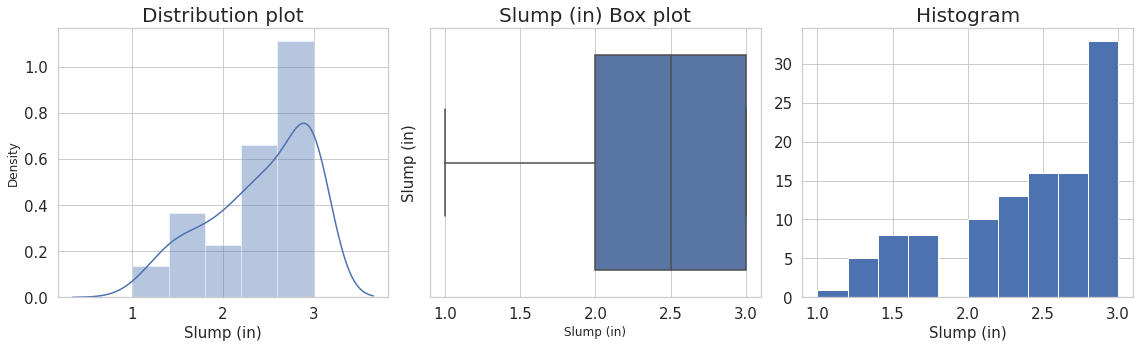

In [12]:
Feature_analysis('Slump (in)')

1st Quartile of Water-to-Cement Ratio (WCM) : 0.38
3rd Quartile of Water-to-Cement Ratio (WCM) : 0.4
Inter Quartile range of Water-to-Cement Ratio (WCM) : 0.020000000000000018 

Lower outlier value in Water-to-Cement Ratio (WCM) : 0.35
upper outlier value in Water-to-Cement Ratio (WCM) : 0.43000000000000005 

Number of lower outliers in Water-to-Cement Ratio (WCM) : 7
Number of upper outliers in Water-to-Cement Ratio (WCM) : 0
% of lower outliers in Water-to-Cement Ratio (WCM) : 6.0
% of upper outliers in Water-to-Cement Ratio (WCM) : 0.0 



/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


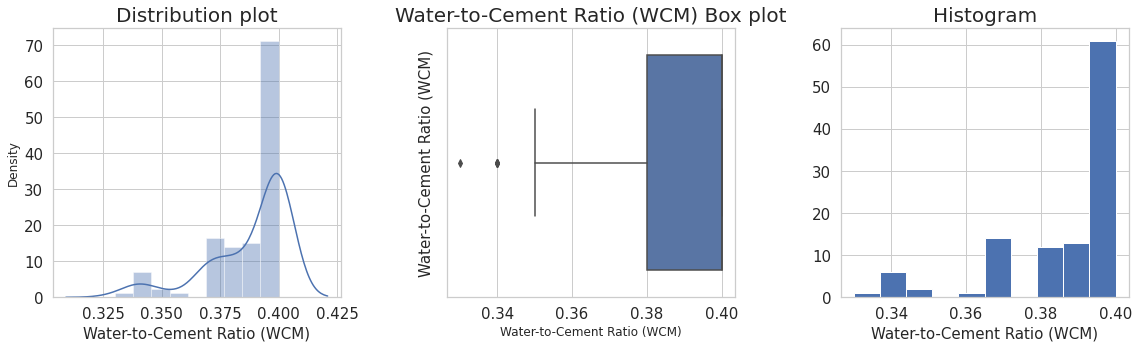

In [13]:
Feature_analysis('Water-to-Cement Ratio (WCM)')

1st Quartile of Water Reducing Admixture (WRA) (mL) : 0.0
3rd Quartile of Water Reducing Admixture (WRA) (mL) : 60.0
Inter Quartile range of Water Reducing Admixture (WRA) (mL) : 60.0 

Lower outlier value in Water Reducing Admixture (WRA) (mL) : -90.0
upper outlier value in Water Reducing Admixture (WRA) (mL) : 150.0 

Number of lower outliers in Water Reducing Admixture (WRA) (mL) : 0
Number of upper outliers in Water Reducing Admixture (WRA) (mL) : 0
% of lower outliers in Water Reducing Admixture (WRA) (mL) : 0.0
% of upper outliers in Water Reducing Admixture (WRA) (mL) : 0.0 



/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


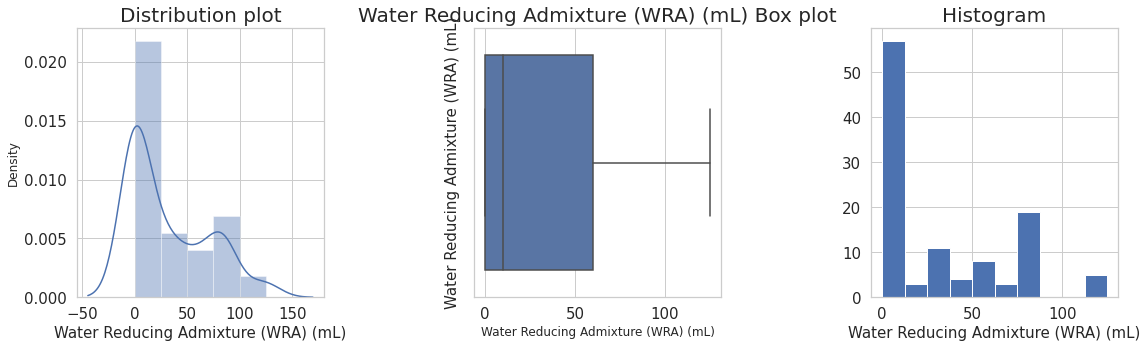

In [14]:
Feature_analysis('Water Reducing Admixture (WRA) (mL)')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

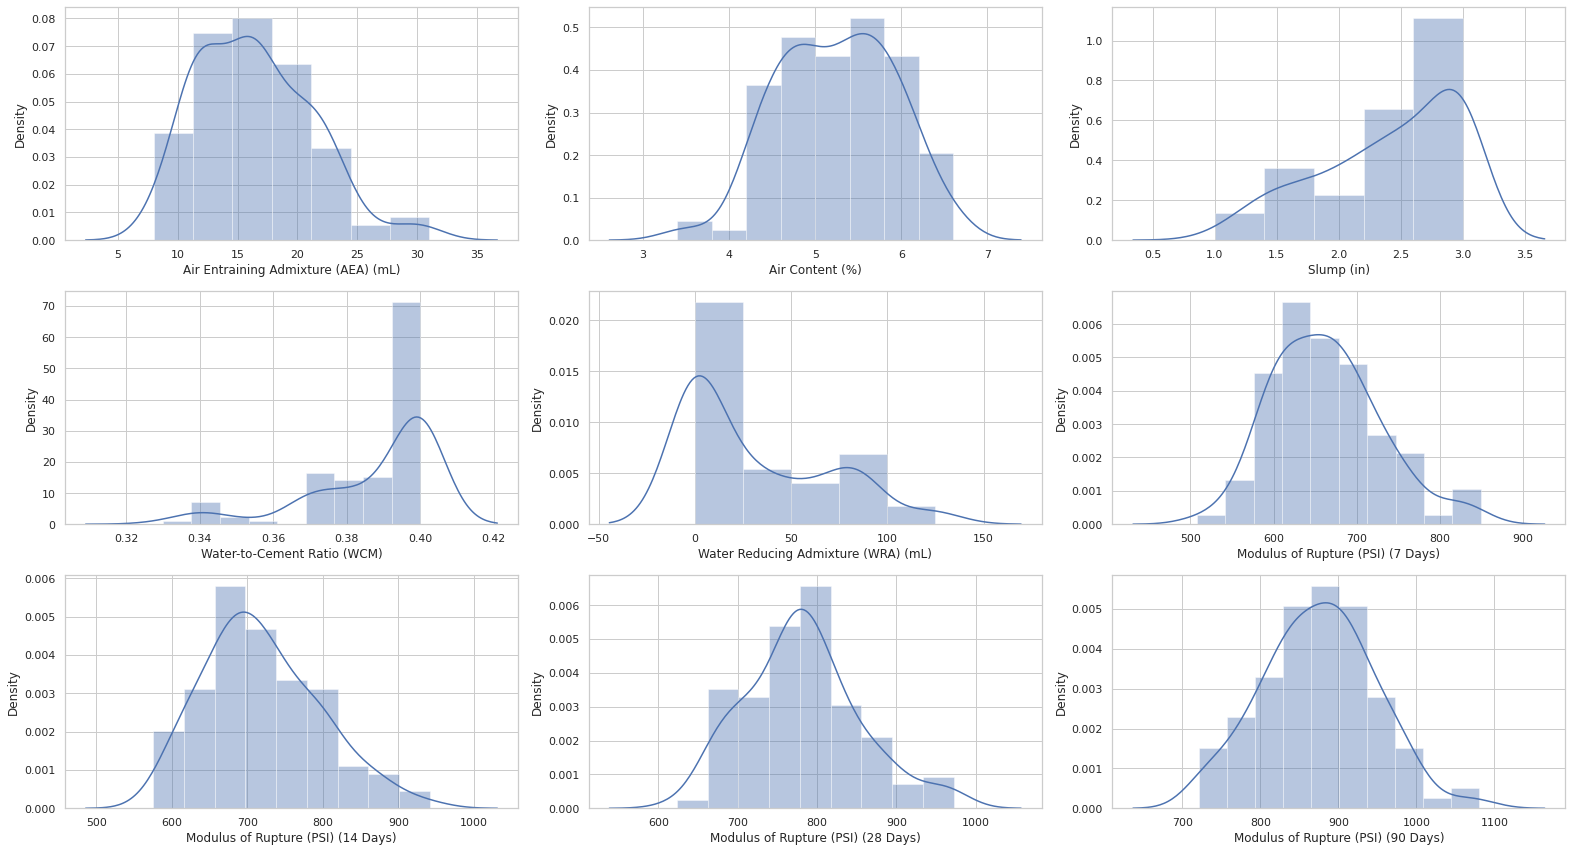

In [15]:
rows = 3
cols = 3
fig, ax  = plt.subplots(nrows=rows, ncols=cols, figsize = (22, 12))

columns = df.columns[6:]
index = 0

for i in range(rows):
  for j in range(cols):
    sns.distplot( df[columns[index]] ,ax = ax[i][j])
    index += 1

plt.tight_layout()

Features Air Entraining Admixture and Air content are near normal distributed

In [16]:
import plotly
from plotly.offline import iplot
import plotly.graph_objs as go
from plotly.figure_factory import create_distplot

In [17]:
def plots(x):
  # Box plot
  trace1 = go.Box(y = df[x],name = x, marker = dict(color='rgb(255,0,0)',))
  data = [trace1]
  layout = go.Layout(title = 'Box Plot')
  fig = go.Figure(data = data, layout = layout)
  iplot(fig)
  #fig.write_image("fig1.png")

  # Histogram
  trace1 = go.Histogram(x = df[x], marker = dict(color = 'rgb(0,255,200)') )
  data = [trace1]
  layout = go.Layout(title = 'Histogram',yaxis = dict(title='Count'), xaxis = dict(title = x))
  fig = go.Figure(data = data, layout = layout)
  iplot(fig)

  #Dist plot
  fig = create_distplot(hist_data = [df[x]], group_labels= [x],  show_rug=False, colors=['rgb(200, 110, 30)'])
  fig.update_layout(title_text='Distplot')
  fig.show()


In [18]:
plots('Air Entraining Admixture (AEA) (mL)')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning:

Dataset has 0 variance; skipping density estimate.



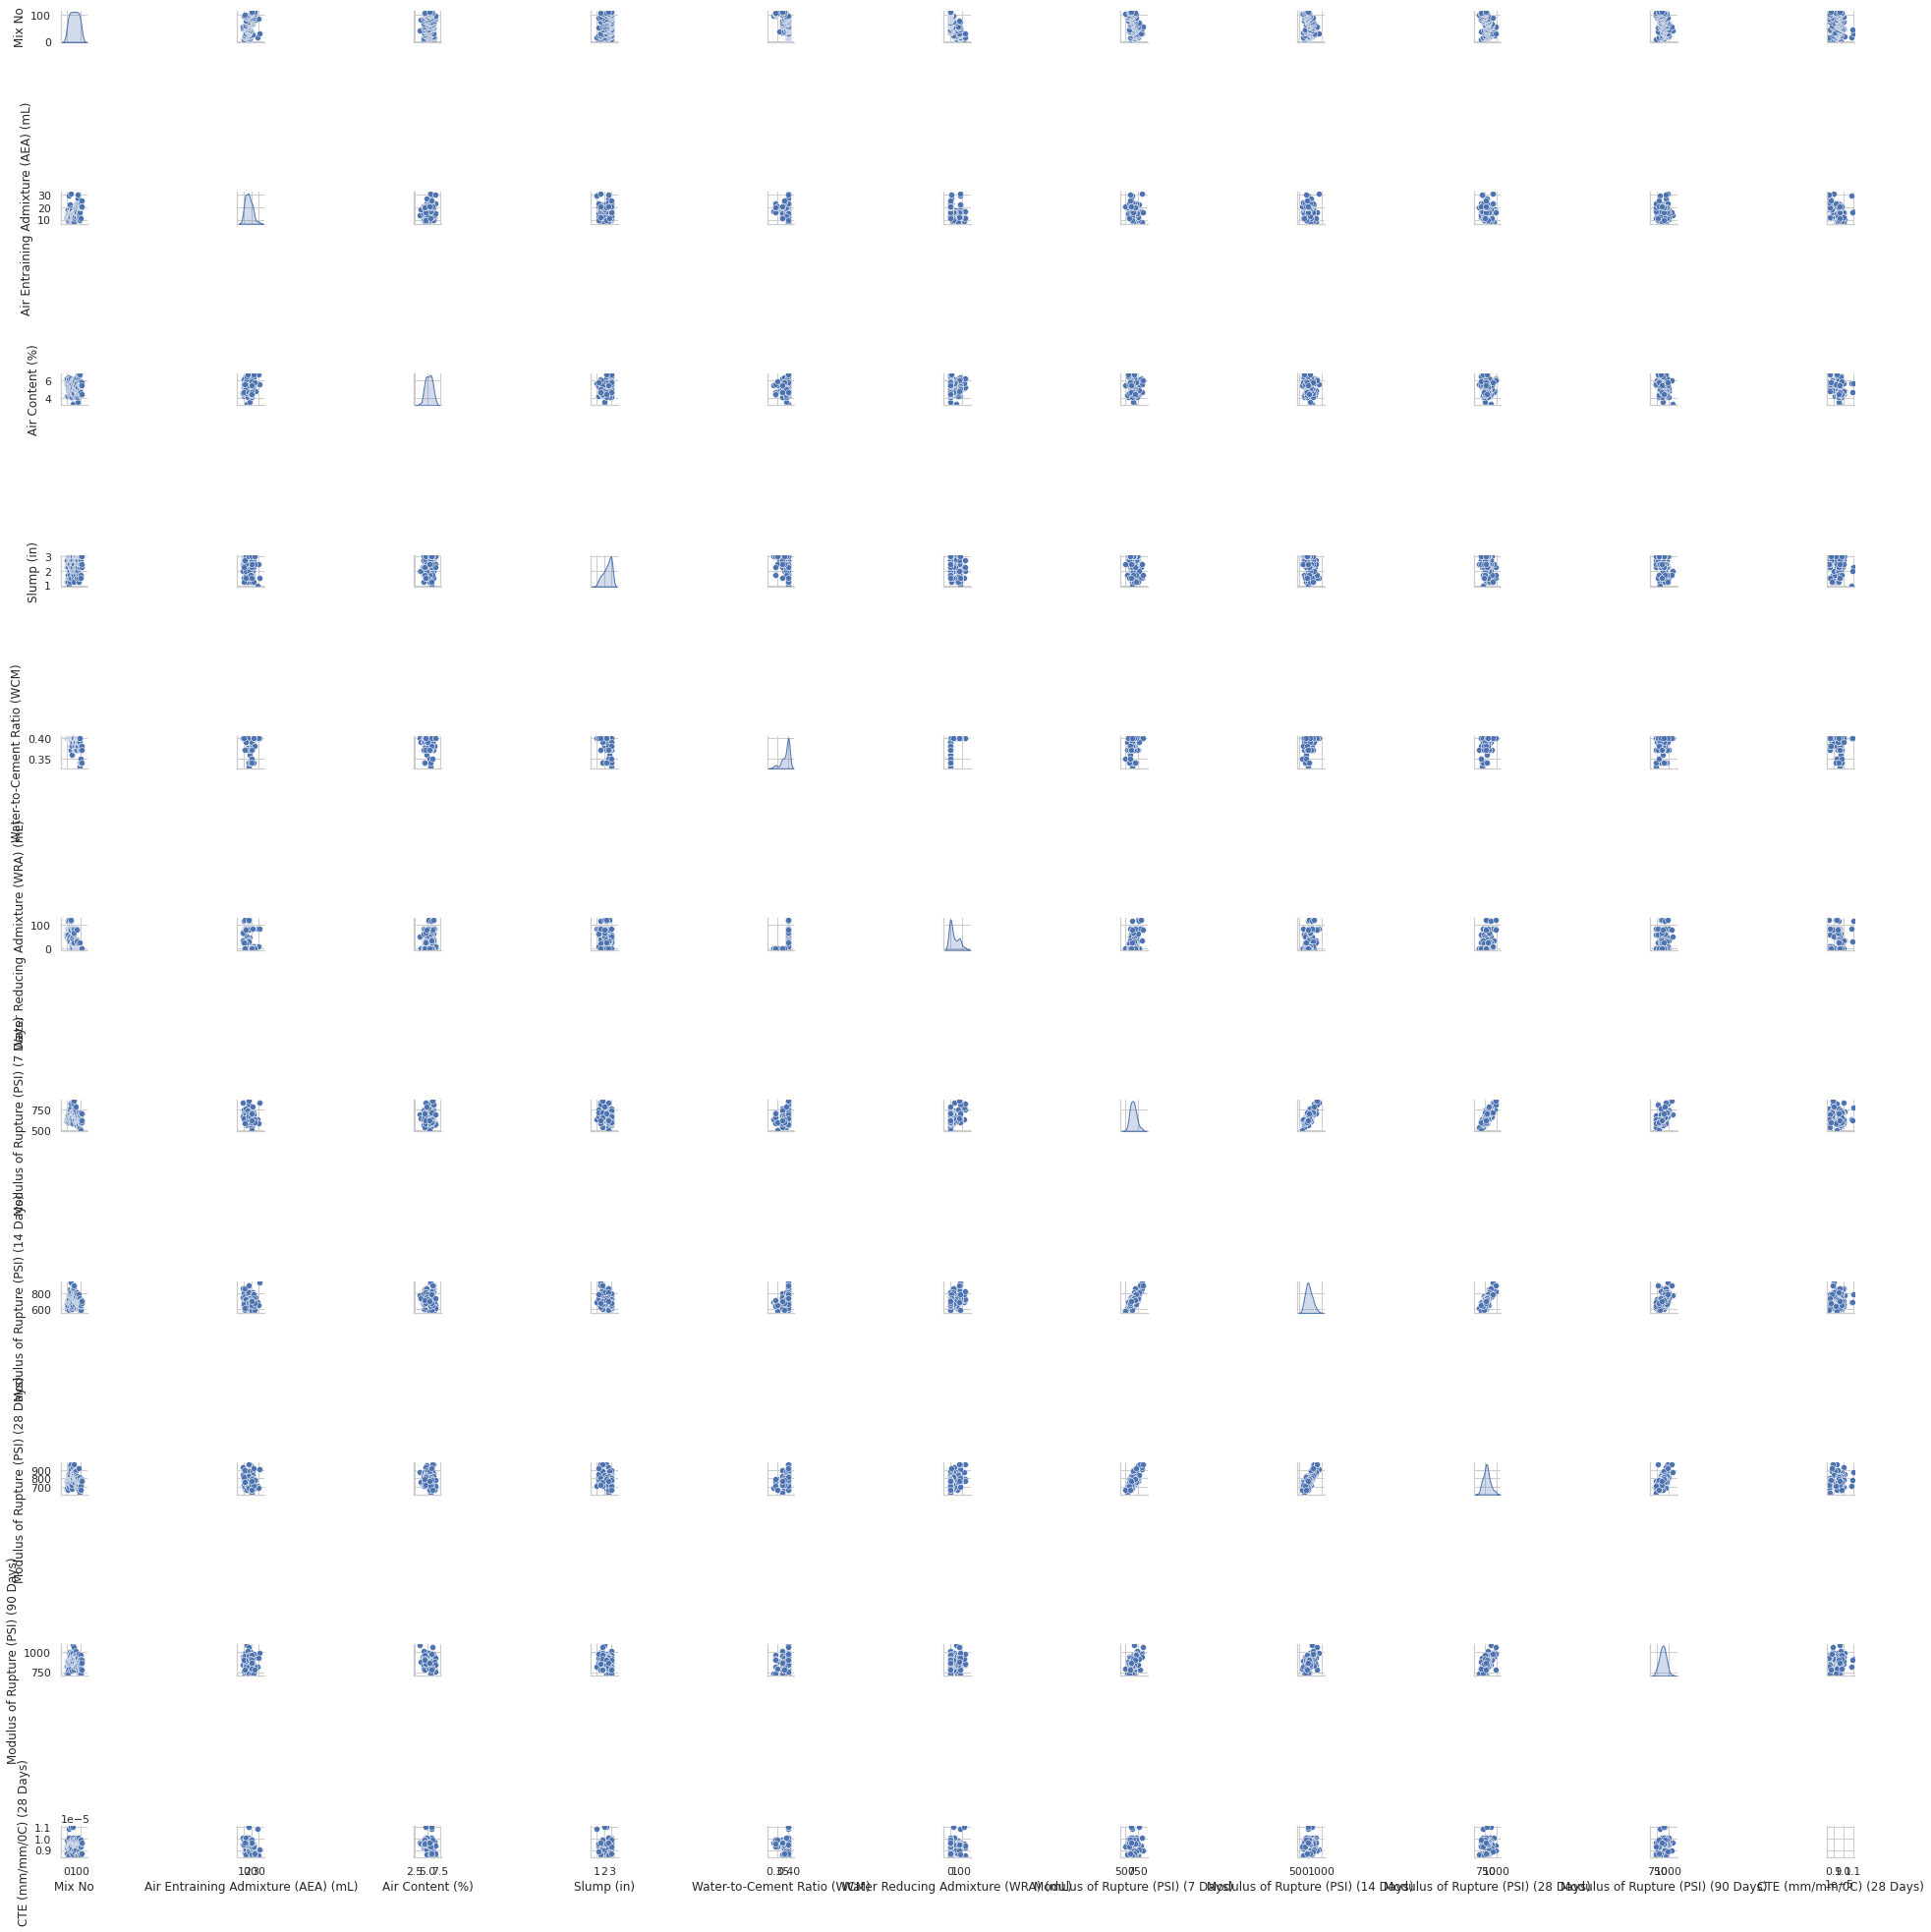

In [19]:
sns.pairplot(df, diag_kind= 'kde')

In [20]:
correlation= df.corr()

Text(0.5, 1.0, 'Correlation among Features')

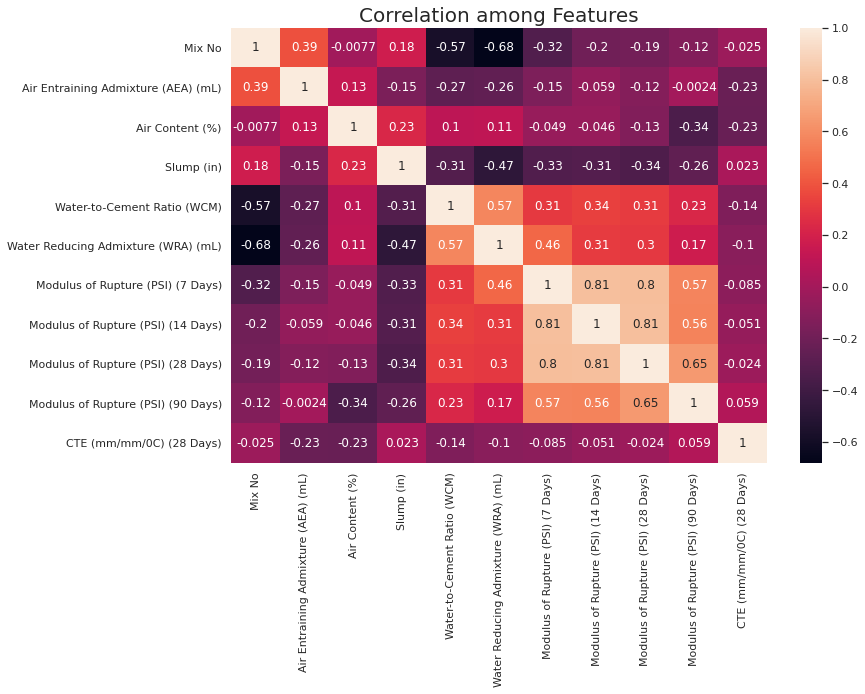

In [21]:
plt.figure(figsize = (12,8))
sns.heatmap(correlation, annot=True)

plt.title("Correlation among Features", fontsize = 20)

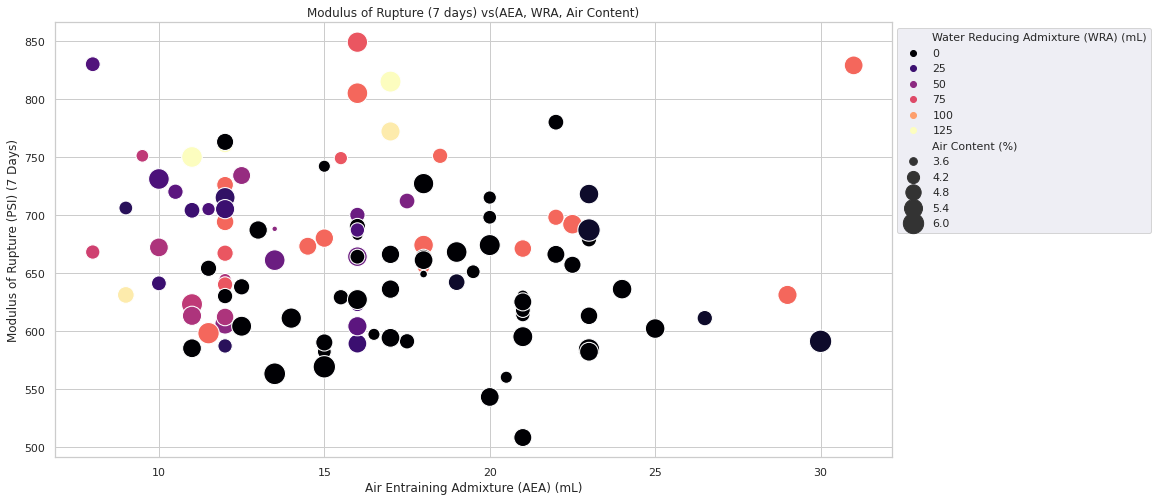

In [22]:
fig, ax = plt.subplots(figsize=(15,8))

sns.set_style(style='darkgrid')
sns.scatterplot(x = df['Air Entraining Admixture (AEA) (mL)'], y= df['Modulus of Rupture (PSI) (7 Days)'], hue=df['Water Reducing Admixture (WRA) (mL)'], size= df['Air Content (%)'], sizes=(30, 500), palette='magma')
ax.set_title("Modulus of Rupture (7 days) vs(AEA, WRA, Air Content)")
ax.legend(loc = 'upper left',bbox_to_anchor=(1,1))

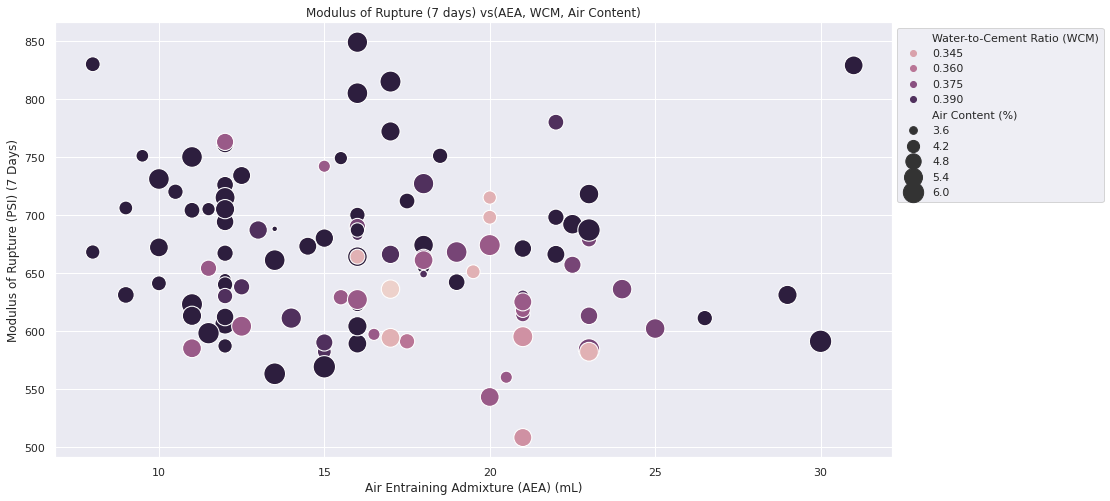

In [23]:
fig, ax = plt.subplots(figsize=(15,8))

sns.set_style(style='darkgrid')
sns.scatterplot(x = df['Air Entraining Admixture (AEA) (mL)'], y= df['Modulus of Rupture (PSI) (7 Days)'], hue=df['Water-to-Cement Ratio (WCM)'], size= df['Air Content (%)'], sizes=(30, 500))
ax.set_title("Modulus of Rupture (7 days) vs(AEA, WCM, Air Content)")
ax.legend(loc = 'upper left',bbox_to_anchor=(1,1))

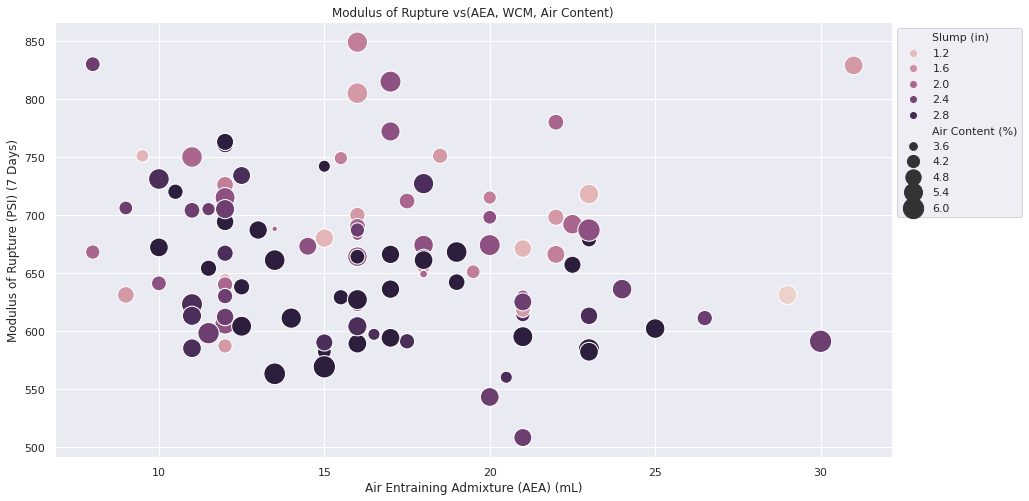

In [24]:
fig, ax = plt.subplots(figsize=(15,8))

sns.set_style(style='darkgrid')
sns.scatterplot(x = df['Air Entraining Admixture (AEA) (mL)'], y= df['Modulus of Rupture (PSI) (7 Days)'], hue= df['Slump (in)'], size= df['Air Content (%)'], sizes=(30, 500))
ax.set_title("Modulus of Rupture vs(AEA, WCM, Air Content)")
ax.legend(loc = 'upper left',bbox_to_anchor=(1,1))

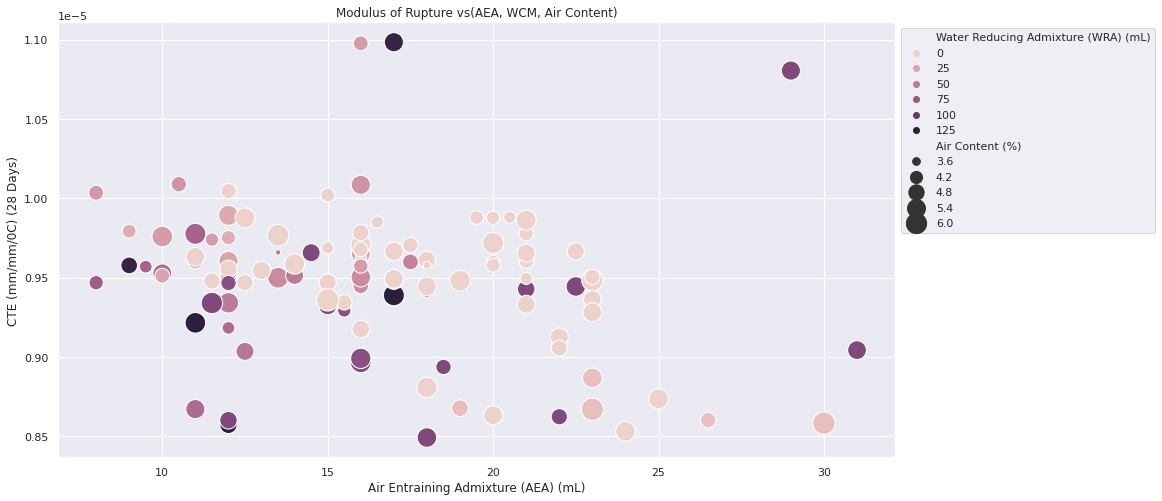

In [25]:
fig, ax = plt.subplots(figsize=(15,8))

sns.set_style(style='darkgrid')
sns.scatterplot(x = df['Air Entraining Admixture (AEA) (mL)'], y= df['CTE (mm/mm/0C) (28 Days)'], hue= df['Water Reducing Admixture (WRA) (mL)'], size= df['Air Content (%)'], sizes=(30, 500))
ax.set_title("Modulus of Rupture vs(AEA, WCM, Air Content)")
ax.legend(loc = 'upper left',bbox_to_anchor=(1,1))

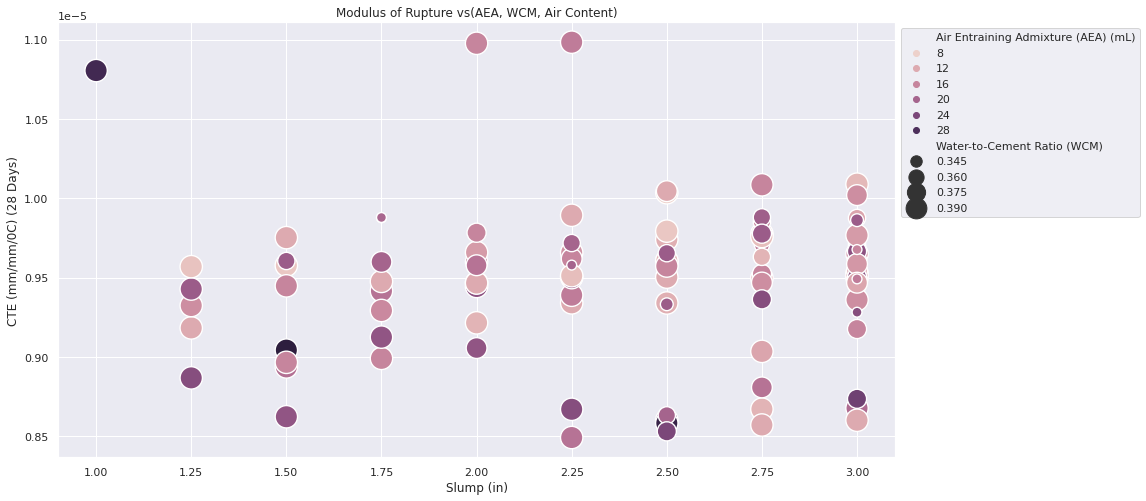

In [26]:
fig, ax = plt.subplots(figsize=(15,8))

sns.set_style(style='darkgrid')
sns.scatterplot(x = df['Slump (in)'], y= df['CTE (mm/mm/0C) (28 Days)'], hue= df['Air Entraining Admixture (AEA) (mL)'], size= df['Water-to-Cement Ratio (WCM)'], sizes=(30, 500))
ax.set_title("Modulus of Rupture vs(AEA, WCM, Air Content)")
ax.legend(loc = 'upper left',bbox_to_anchor=(1,1))

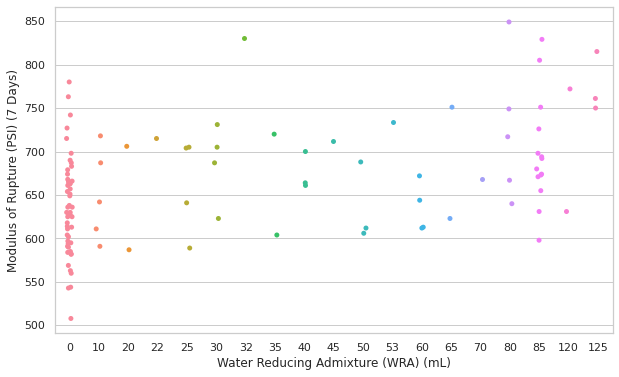

In [27]:
sns.set_style('whitegrid')
plt.subplots(figsize= (10,6))
sns.stripplot(x = 'Water Reducing Admixture (WRA) (mL)', y = 'Modulus of Rupture (PSI) (7 Days)', data=df)

In [28]:
df.head(2)

,Mix No,Mix Types,Cement Source,Supplementary Cementitious Material (SCM),Fine Aggregate Type,Coarse Aggregate,Air Entraining Admixture (AEA) (mL),Air Content (%),Slump (in),Water-to-Cement Ratio (WCM),Water Reducing Admixture (WRA) (mL),Modulus of Rupture (PSI) (7 Days),Modulus of Rupture (PSI) (14 Days),Modulus of Rupture (PSI) (28 Days),Modulus of Rupture (PSI) (90 Days),CTE (mm/mm/0C) (28 Days)
0,1,A,Source 1,None,Sand A (igneous),Glacial Granite,12.0,6.0,2.25,0.4,50,606,684,676,817,0.000009
1,2,A,Source 1,None,Sand A (igneous),Glacial Granite,11.0,6.2,2.75,0.4,65,623,605,675,829,0.000010


In [29]:
pd.get_dummies(df['Supplementary Cementitious Material (SCM)'], prefix= 'SCM') 

,SCM_Fly Ash,SCM_None,SCM_Slag
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
105,1,0,0
106,1,0,0
107,1,0,0
108,1,0,0


In [30]:
df = pd.get_dummies(df) 

In [31]:
df

,Mix No,Air Entraining Admixture (AEA) (mL),Air Content (%),Slump (in),Water-to-Cement Ratio (WCM),Water Reducing Admixture (WRA) (mL),Modulus of Rupture (PSI) (7 Days),Modulus of Rupture (PSI) (14 Days),Modulus of Rupture (PSI) (28 Days),Modulus of Rupture (PSI) (90 Days),CTE (mm/mm/0C) (28 Days),Mix Types_A,Mix Types_A-F,Mix Types_A-S,Cement Source_Source 1,Cement Source_Source 2,Supplementary Cementitious Material (SCM)_Fly Ash,Supplementary Cementitious Material (SCM)_None,Supplementary Cementitious Material (SCM)_Slag,Fine Aggregate Type_Sand A (igneous),Fine Aggregate Type_Sand B (carbonates),Coarse Aggregate_Crushed Stone,Coarse Aggregate_Glacial Granite
0,1,12.0,6.0,2.25,0.40,50,606,684,676,817,0.000009,1,0,0,1,0,0,1,0,1,0,0,1
1,2,11.0,6.2,2.75,0.40,65,623,605,675,829,0.000010,1,0,0,1,0,0,1,0,1,0,0,1
2,3,12.0,4.3,1.25,0.40,60,644,665,758,816,0.000009,1,0,0,1,0,0,1,0,1,0,0,1
3,4,11.0,5.7,2.75,0.40,60,613,630,682,734,0.000009,1,0,0,1,0,0,1,0,1,0,0,1
4,5,9.0,5.1,1.50,0.40,120,631,688,782,904,0.000010,1,0,0,1,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,106,23.0,5.6,3.00,0.34,0,582,639,712,731,0.000009,0,1,0,1,0,1,0,0,0,1,0,1
106,107,21.0,5.9,3.00,0.35,0,595,661,664,788,0.000010,0,1,0,1,0,1,0,0,0,1,0,1
107,108,20.0,4.5,2.25,0.34,0,698,716,787,897,0.000010,0,1,0,1,0,1,0,0,0,1,1,0
108,109,25.0,5.8,3.00,0.38,0,602,685,775,782,0.000009,0,1,0,1,0,1,0,0,0,1,1,0


In [32]:
df.head()

,Mix No,Air Entraining Admixture (AEA) (mL),Air Content (%),Slump (in),Water-to-Cement Ratio (WCM),Water Reducing Admixture (WRA) (mL),Modulus of Rupture (PSI) (7 Days),Modulus of Rupture (PSI) (14 Days),Modulus of Rupture (PSI) (28 Days),Modulus of Rupture (PSI) (90 Days),CTE (mm/mm/0C) (28 Days),Mix Types_A,Mix Types_A-F,Mix Types_A-S,Cement Source_Source 1,Cement Source_Source 2,Supplementary Cementitious Material (SCM)_Fly Ash,Supplementary Cementitious Material (SCM)_None,Supplementary Cementitious Material (SCM)_Slag,Fine Aggregate Type_Sand A (igneous),Fine Aggregate Type_Sand B (carbonates),Coarse Aggregate_Crushed Stone,Coarse Aggregate_Glacial Granite
0,1,12.0,6.0,2.25,0.4,50,606,684,676,817,0.000009,1,0,0,1,0,0,1,0,1,0,0,1
1,2,11.0,6.2,2.75,0.4,65,623,605,675,829,0.000010,1,0,0,1,0,0,1,0,1,0,0,1
2,3,12.0,4.3,1.25,0.4,60,644,665,758,816,0.000009,1,0,0,1,0,0,1,0,1,0,0,1
3,4,11.0,5.7,2.75,0.4,60,613,630,682,734,0.000009,1,0,0,1,0,0,1,0,1,0,0,1
4,5,9.0,5.1,1.50,0.4,120,631,688,782,904,0.000010,1,0,0,1,0,0,1,0,1,0,0,1


Dropping columns 'Mix Types_A-S', 'Cement Source_Source 2', 'Supplementary Cementitious Materila (SCM)_Slag', 'Fine Aggregate Type_Sand B (carbonates)', 'Coarse Aggregate_Glacial Granite'      
to avoid dummy variable trap

In [33]:
#df.drop(columns= ['Mix Types_A-S', 'Cement Source_Source 2', 'Supplementary Cementitious Materila (SCM)_Slag', 'Fine Aggregate Type_Sand B (carbonates)', 'Coarse Aggregate_Glacial Granite'], axis=1, inplace=True)

In [34]:
df

,Mix No,Air Entraining Admixture (AEA) (mL),Air Content (%),Slump (in),Water-to-Cement Ratio (WCM),Water Reducing Admixture (WRA) (mL),Modulus of Rupture (PSI) (7 Days),Modulus of Rupture (PSI) (14 Days),Modulus of Rupture (PSI) (28 Days),Modulus of Rupture (PSI) (90 Days),CTE (mm/mm/0C) (28 Days),Mix Types_A,Mix Types_A-F,Mix Types_A-S,Cement Source_Source 1,Cement Source_Source 2,Supplementary Cementitious Material (SCM)_Fly Ash,Supplementary Cementitious Material (SCM)_None,Supplementary Cementitious Material (SCM)_Slag,Fine Aggregate Type_Sand A (igneous),Fine Aggregate Type_Sand B (carbonates),Coarse Aggregate_Crushed Stone,Coarse Aggregate_Glacial Granite
0,1,12.0,6.0,2.25,0.40,50,606,684,676,817,0.000009,1,0,0,1,0,0,1,0,1,0,0,1
1,2,11.0,6.2,2.75,0.40,65,623,605,675,829,0.000010,1,0,0,1,0,0,1,0,1,0,0,1
2,3,12.0,4.3,1.25,0.40,60,644,665,758,816,0.000009,1,0,0,1,0,0,1,0,1,0,0,1
3,4,11.0,5.7,2.75,0.40,60,613,630,682,734,0.000009,1,0,0,1,0,0,1,0,1,0,0,1
4,5,9.0,5.1,1.50,0.40,120,631,688,782,904,0.000010,1,0,0,1,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,106,23.0,5.6,3.00,0.34,0,582,639,712,731,0.000009,0,1,0,1,0,1,0,0,0,1,0,1
106,107,21.0,5.9,3.00,0.35,0,595,661,664,788,0.000010,0,1,0,1,0,1,0,0,0,1,0,1
107,108,20.0,4.5,2.25,0.34,0,698,716,787,897,0.000010,0,1,0,1,0,1,0,0,0,1,1,0
108,109,25.0,5.8,3.00,0.38,0,602,685,775,782,0.000009,0,1,0,1,0,1,0,0,0,1,1,0


In [35]:
x = df.drop(columns= ['Mix No', 'Modulus of Rupture (PSI) (7 Days)', 'Modulus of Rupture (PSI) (14 Days)',
                      'Modulus of Rupture (PSI) (28 Days)', 'Modulus of Rupture (PSI) (90 Days)',
                      'CTE (mm/mm/0C) (28 Days)'], axis=1)
#y = df['CTE (mm/mm/0C) (28 Days)']
y = df['Modulus of Rupture (PSI) (7 Days)']
#y = df['Modulus of Rupture (PSI) (14 Days)']
#y = df['Modulus of Rupture (PSI) (28 Days)']
#y = df['Modulus of Rupture (PSI) (90 Days)']

In [36]:
x

,Air Entraining Admixture (AEA) (mL),Air Content (%),Slump (in),Water-to-Cement Ratio (WCM),Water Reducing Admixture (WRA) (mL),Mix Types_A,Mix Types_A-F,Mix Types_A-S,Cement Source_Source 1,Cement Source_Source 2,Supplementary Cementitious Material (SCM)_Fly Ash,Supplementary Cementitious Material (SCM)_None,Supplementary Cementitious Material (SCM)_Slag,Fine Aggregate Type_Sand A (igneous),Fine Aggregate Type_Sand B (carbonates),Coarse Aggregate_Crushed Stone,Coarse Aggregate_Glacial Granite
0,12.0,6.0,2.25,0.40,50,1,0,0,1,0,0,1,0,1,0,0,1
1,11.0,6.2,2.75,0.40,65,1,0,0,1,0,0,1,0,1,0,0,1
2,12.0,4.3,1.25,0.40,60,1,0,0,1,0,0,1,0,1,0,0,1
3,11.0,5.7,2.75,0.40,60,1,0,0,1,0,0,1,0,1,0,0,1
4,9.0,5.1,1.50,0.40,120,1,0,0,1,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,23.0,5.6,3.00,0.34,0,0,1,0,1,0,1,0,0,0,1,0,1
106,21.0,5.9,3.00,0.35,0,0,1,0,1,0,1,0,0,0,1,0,1
107,20.0,4.5,2.25,0.34,0,0,1,0,1,0,1,0,0,0,1,1,0
108,25.0,5.8,3.00,0.38,0,0,1,0,1,0,1,0,0,0,1,1,0


In [37]:
categorical_cols = x.columns
categorical_cols

Index(['Air Entraining Admixture (AEA) (mL)', 'Air Content (%)', 'Slump (in)',
       'Water-to-Cement Ratio (WCM)', 'Water Reducing Admixture (WRA) (mL)',
       'Mix Types_A', 'Mix Types_A-F', 'Mix Types_A-S',
       'Cement Source_Source 1', 'Cement Source_Source 2',
       'Supplementary Cementitious Material (SCM)_Fly Ash',
       'Supplementary Cementitious Material (SCM)_None',
       'Supplementary Cementitious Material (SCM)_Slag',
       'Fine Aggregate Type_Sand A (igneous)',
       'Fine Aggregate Type_Sand B (carbonates)',
       'Coarse Aggregate_Crushed Stone', 'Coarse Aggregate_Glacial Granite'],
      dtype='object')

In [38]:
y

0      606
1      623
2      644
3      613
4      631
      ... 
105    582
106    595
107    698
108    602
109    625
Name: Modulus of Rupture (PSI) (7 Days), Length: 110, dtype: int64

In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score ,accuracy_score, precision_score, mean_squared_error

ss = StandardScaler()
x.iloc[ : , 0:5]= ss.fit_transform(x.iloc[ : , 0:5])
x

,Air Entraining Admixture (AEA) (mL),Air Content (%),Slump (in),Water-to-Cement Ratio (WCM),Water Reducing Admixture (WRA) (mL),Mix Types_A,Mix Types_A-F,Mix Types_A-S,Cement Source_Source 1,Cement Source_Source 2,Supplementary Cementitious Material (SCM)_Fly Ash,Supplementary Cementitious Material (SCM)_None,Supplementary Cementitious Material (SCM)_Slag,Fine Aggregate Type_Sand A (igneous),Fine Aggregate Type_Sand B (carbonates),Coarse Aggregate_Crushed Stone,Coarse Aggregate_Glacial Granite
0,-0.919883,1.130605,-0.293022,0.693264,0.493938,1,0,0,1,0,0,1,0,1,0,0,1
1,-1.127446,1.428489,0.602323,0.693264,0.890918,1,0,0,1,0,0,1,0,1,0,0,1
2,-0.919883,-1.401409,-2.083712,0.693264,0.758591,1,0,0,1,0,0,1,0,1,0,0,1
3,-1.127446,0.683779,0.602323,0.693264,0.758591,1,0,0,1,0,0,1,0,1,0,0,1
4,-1.542573,-0.209873,-1.636040,0.693264,2.346509,1,0,0,1,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,1.363314,0.534837,1.049996,-2.671106,-0.829326,0,1,0,1,0,1,0,0,0,1,0,1
106,0.948187,0.981663,1.049996,-2.110378,-0.829326,0,1,0,1,0,1,0,0,0,1,0,1
107,0.740624,-1.103525,-0.293022,-2.671106,-0.829326,0,1,0,1,0,1,0,0,0,1,1,0
108,1.778440,0.832721,1.049996,-0.428193,-0.829326,0,1,0,1,0,1,0,0,0,1,1,0


In [40]:
x.describe()

,Air Entraining Admixture (AEA) (mL),Air Content (%),Slump (in),Water-to-Cement Ratio (WCM),Water Reducing Admixture (WRA) (mL),Mix Types_A,Mix Types_A-F,Mix Types_A-S,Cement Source_Source 1,Cement Source_Source 2,Supplementary Cementitious Material (SCM)_Fly Ash,Supplementary Cementitious Material (SCM)_None,Supplementary Cementitious Material (SCM)_Slag,Fine Aggregate Type_Sand A (igneous),Fine Aggregate Type_Sand B (carbonates),Coarse Aggregate_Crushed Stone,Coarse Aggregate_Glacial Granite
count,1.100000e+02,1.100000e+02,1.100000e+02,1.100000e+02,1.100000e+02,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.00000,110.00000
mean,-2.926952e-16,-4.536775e-16,2.301190e-16,-3.874678e-15,1.635056e-16,0.136364,0.500000,0.363636,0.772727,0.227273,0.500000,0.136364,0.363636,0.772727,0.227273,0.60000,0.40000
std,1.004577e+00,1.004577e+00,1.004577e+00,1.004577e+00,1.004577e+00,0.344745,0.502288,0.483247,0.420988,0.420988,0.502288,0.344745,0.483247,0.420988,0.420988,0.49214,0.49214
min,-1.750136e+00,-2.741887e+00,-2.531385e+00,-3.231835e+00,-8.293259e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000
25%,-9.198830e-01,-7.684054e-01,-7.406947e-01,-4.281926e-01,-8.293259e-01,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.00000
50%,-8.962962e-02,8.801119e-02,1.546505e-01,6.932643e-01,-5.646730e-01,0.000000,0.500000,0.000000,1.000000,0.000000,0.500000,0.000000,0.000000,1.000000,0.000000,1.00000,0.00000
75%,7.406237e-01,7.954857e-01,1.049996e+00,6.932643e-01,7.585914e-01,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.00000,1.00000
max,3.023820e+00,2.024257e+00,1.049996e+00,6.932643e-01,2.478835e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.00000


In [88]:
x[0:1]

array([[-0.91988296,  1.13060524, -0.29302207,  0.69326425,  0.49393849,
         1.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  1.        ]])

## Linear Regression

In [89]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=20)

from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()

lr_model.fit(x_train,y_train)

print('Train score',lr_model.score(x_train,y_train))

print('Test score',lr_model.score(x_test, y_test))

Train score 0.5721295857996239
Test score 0.4936574677075294


In [90]:
lr_cv_score = cross_val_score(LinearRegression(normalize=False), x, y, cv=10)

print(lr_cv_score)
print('Average score is', np.mean(lr_cv_score))

[ 0.15866754 -0.09348631  0.60046467  0.4057257  -0.07266482 -0.2928468
  0.11154892 -0.05519402  0.05200116  0.19758258]
Average score is 0.1011798634017329


In [91]:
lr_cv_score = cross_val_score(LinearRegression(normalize=False), x, y, cv=10, scoring='neg_root_mean_squared_error')

print((-(lr_cv_score)))
print(np.mean(-(lr_cv_score)))

[24.70663858 55.36208795 44.91212177 34.01799457 57.46410432 54.69165718
 58.73940864 38.68181179 48.02037332 48.70167388]
46.52978720072407


In [92]:
from sklearn.model_selection import GridSearchCV

lr_Gs_clf = GridSearchCV(LinearRegression(), {'normalize': [True, False]}, cv=10, return_train_score=False, scoring='neg_root_mean_squared_error')
lr_Gs_clf.fit(x,y)

lr_df = pd.DataFrame(lr_Gs_clf.cv_results_)

print('Best parameters are',lr_Gs_clf.best_params_)

print('Average best score is', -(lr_Gs_clf.best_score_))

Best parameters are {'normalize': False}
Average best score is 46.52978720072407


In [93]:
from sklearn import metrics


print(metrics.SCORERS.keys())
print()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])



In [94]:
lr_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_normalize,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001150,0.000491,0.000557,0.000449,True,{'normalize': True},-24.706639,-55.362088,-44.912122,-34.017995,-57.464104,-54.691657,-58.739409,-38.681812,-48.020373,-48.701674,-46.529787,10.569773,2
1,0.000741,0.000024,0.000379,0.000022,False,{'normalize': False},-24.706639,-55.362088,-44.912122,-34.017995,-57.464104,-54.691657,-58.739409,-38.681812,-48.020373,-48.701674,-46.529787,10.569773,1


## Support Vector Regressor

In [95]:
from sklearn.svm import SVR

x_train, x_test, y_train, y_test = train_test_split(x, y , test_size = 0.2, random_state = 10)

svr_model = SVR()

svr_model.fit(x_train, y_train)

print('Train score' , svr_model.score(x_train,y_train))

print('Test score', svr_model.score(x_test, y_test))


Train score 0.06742109321504863
Test score 0.06451037817753746


In [96]:
svr_cv_score = cross_val_score(SVR(kernel='linear', C=100), x, y, cv=10)

print(svr_cv_score)
print(np.mean(svr_cv_score))

[-2.86785174  0.12137934  0.45337641  0.42783147 -0.10608155 -0.11394024
  0.09384643  0.09670503  0.06334724  0.29939654]
-0.15319910708857856


In [97]:
from sklearn.model_selection import GridSearchCV

svr_Gs_clf = GridSearchCV(SVR(),  { 'C':list(range(2,102, 2)), 'kernel': ['linear', 'rbf', 'poly'] }, cv=10, return_train_score=False,scoring='neg_root_mean_squared_error')

svr_Gs_clf.fit(x, y)

svr_df = pd.DataFrame(svr_Gs_clf.cv_results_)
print(svr_df)

print('Best parameters are',svr_Gs_clf.best_params_)

print('Average Best score is', -(svr_Gs_clf.best_score_))

     mean_fit_time  std_fit_time  ...  std_test_score  rank_test_score
0         0.001722      0.000354  ...        9.868981               50
1         0.001741      0.000235  ...       19.706316              150
2         0.001213      0.000106  ...       18.121745              149
3         0.001745      0.000214  ...        9.318756               49
4         0.001416      0.000022  ...       18.161431              146
..             ...           ...  ...             ...              ...
145       0.002149      0.000051  ...        8.706003               52
146       0.002789      0.000218  ...        8.871759              139
147       0.006446      0.004443  ...        8.102517                1
148       0.002152      0.000096  ...        8.653017               51
149       0.002735      0.000237  ...        8.901722              141

[150 rows x 20 columns]
Best parameters are {'C': 100, 'kernel': 'linear'}
Average Best score is 48.59814731499797


In [98]:
svr_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001722,0.000354,0.000550,0.000130,2,linear,"{'C': 2, 'kernel': 'linear'}",-56.031662,-51.005267,-63.846860,-33.397395,-71.217198,-49.538409,-55.945310,-43.138178,-52.140523,-49.858439,-52.611924,9.868981,50
1,0.001741,0.000235,0.000586,0.000098,2,rbf,"{'C': 2, 'kernel': 'rbf'}",-34.048489,-57.904189,-88.312620,-43.834443,-105.466948,-49.977528,-61.000590,-61.503029,-57.960014,-65.866993,-62.587484,19.706316,150
2,0.001213,0.000106,0.000443,0.000018,2,poly,"{'C': 2, 'kernel': 'poly'}",-38.664254,-59.797283,-86.614494,-45.061749,-102.755396,-50.086093,-60.429683,-61.530689,-55.982559,-63.324357,-62.424656,18.121745,149
3,0.001745,0.000214,0.000428,0.000023,4,linear,"{'C': 4, 'kernel': 'linear'}",-57.159683,-50.651092,-62.955311,-32.602042,-65.601104,-49.751183,-57.187077,-41.190954,-49.487305,-49.795981,-51.638173,9.318756,49
4,0.001416,0.000022,0.000448,0.000021,4,rbf,"{'C': 4, 'kernel': 'rbf'}",-35.543955,-58.472018,-85.045998,-40.596955,-99.590051,-51.169769,-59.924680,-57.381748,-54.068602,-63.014475,-60.480825,18.161431,146
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,0.002149,0.000051,0.000462,0.000012,98,rbf,"{'C': 98, 'kernel': 'rbf'}",-56.427241,-53.870883,-64.281396,-35.242825,-66.680167,-50.886778,-62.036438,-49.849918,-54.591962,-47.515215,-54.138282,8.706003,52
146,0.002789,0.000218,0.000441,0.000019,98,poly,"{'C': 98, 'kernel': 'poly'}",-51.558317,-62.020740,-56.214034,-40.804551,-67.266910,-50.850378,-62.966558,-56.719407,-58.169089,-74.349402,-58.091939,8.871759,139
147,0.006446,0.004443,0.000542,0.000050,100,linear,"{'C': 100, 'kernel': 'linear'}",-52.974242,-49.625683,-52.532754,-33.379299,-58.352330,-50.766649,-59.321717,-35.789485,-47.732143,-45.507173,-48.598147,8.102517,1
148,0.002152,0.000096,0.000447,0.000011,100,rbf,"{'C': 100, 'kernel': 'rbf'}",-56.473904,-53.919761,-64.261129,-35.306953,-66.387045,-50.950136,-62.024866,-49.797503,-54.690229,-47.459006,-54.127053,8.653017,51


## Decision Tree

In [99]:
from sklearn.tree import DecisionTreeRegressor, export_graphviz

dt_model = DecisionTreeRegressor(criterion='mae' )

x_train, x_test, y_train, y_test = train_test_split(x, y , test_size = 0.2, random_state = 10)

DTR = dt_model.fit(x_train, y_train)

#decision_tree_binary_classifier = dt.fit(train[categorical_cols], train.play)

print( 'Train score' ,dt_model.score(x_train, y_train))

print('Test score',dt_model.score(x_test , y_test))

print(dt_model.get_params)


Train score 1.0
Test score 0.5483638458127431
<bound method BaseEstimator.get_params of DecisionTreeRegressor(ccp_alpha=0.0, criterion='mae', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')>


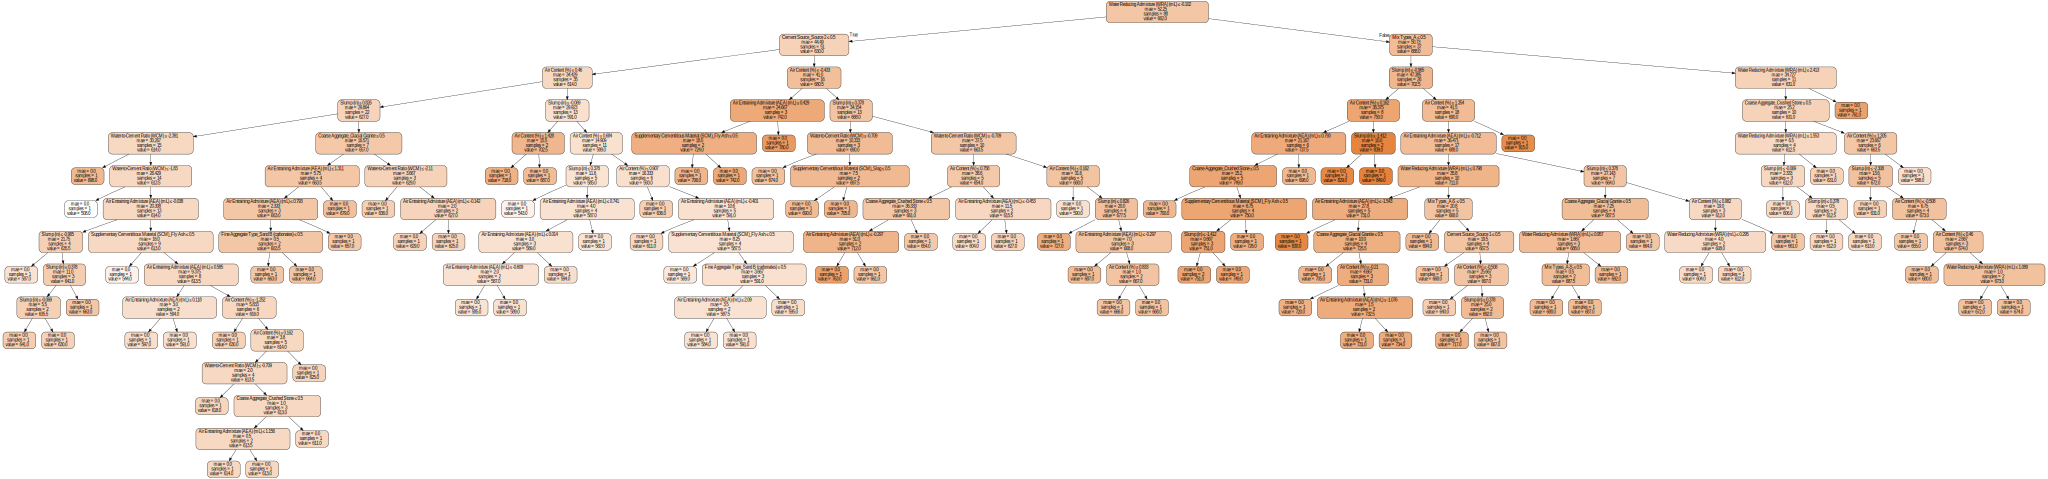

<Figure size 288x360 with 0 Axes>

In [100]:
plt.figure(figsize=(4,5))
from IPython.display import SVG 
import numpy as np
import pydotplus
from sklearn.externals.six import StringIO
dot_data = StringIO()
export_graphviz(
    DTR,
    out_file=dot_data,  
    feature_names=np.array(categorical_cols),  
    filled=True,
    rounded=True,  
    special_characters=True
)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
SVG(graph.create(format='svg')) 

In [101]:
dt_cv_score = cross_val_score(DecisionTreeRegressor(), x, y, cv=10)

print(dt_cv_score)
print(np.mean(dt_cv_score))

[-5.19703839 -3.93880066 -0.42870964  0.49323493 -1.73102634 -1.75587426
 -0.25233132 -1.91726308 -1.93483077 -1.13266436]
-1.779530388510232


In [102]:
dt_Gs_clf = GridSearchCV(DecisionTreeRegressor(), {'criterion': ['mse', 'mae']}, cv=10, return_train_score=False, scoring='neg_root_mean_squared_error')
dt_Gs_clf.fit(x,y)

dt_df = pd.DataFrame(dt_Gs_clf.cv_results_)
print(dt_df)

print(dt_Gs_clf.best_params_)

print(-(dt_Gs_clf.best_score_))


   mean_fit_time  std_fit_time  ...  std_test_score  rank_test_score
0       0.002662      0.001805  ...       20.754883                2
1       0.003537      0.001021  ...       18.067226                1

[2 rows x 19 columns]
{'criterion': 'mae'}
76.13381092104295


## Random Forest

In [103]:
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestRegressor

x_train, x_test, y_train, y_test = train_test_split(x, y , test_size = 0.1, random_state = 10)

rf_model = RandomForestRegressor(criterion='mae', n_estimators=110)
rf_model.fit(x_train, y_train)

print('Train score', rf_model.score(x_train, y_train))
print('Test score',rf_model.score(x_test, y_test))

Train score 0.8961658834862782
Test score 0.4482336246164134


In [104]:
rf_cv_score = cross_val_score(RandomForestRegressor(), x, y , cv=10, )

print(rf_cv_score)
print(np.mean(rf_cv_score))


[-3.05321729 -0.52051524  0.02549559  0.37553446 -0.59725786 -0.5849893
  0.10128635 -0.86763632  0.11373454 -0.06944173]
-0.507700680963171


In [105]:
rf_Gs_clf = GridSearchCV( RandomForestRegressor(), {'n_estimators':list(range(10, 201, 10)), 'criterion': ['mae', 'mse'] }, cv=10, return_train_score=False,scoring='neg_root_mean_squared_error')
rf_Gs_clf.fit(x,y)

rf_df = pd.DataFrame(rf_Gs_clf.cv_results_)

print(rf_Gs_clf.best_params_)

print(-(rf_Gs_clf.best_score_))


{'criterion': 'mae', 'n_estimators': 160}
55.67570183298587


In [106]:
rf_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.027678,0.002504,0.001454,0.000089,mae,10,"{'criterion': 'mae', 'n_estimators': 10}",-53.246519,-69.547159,-67.494033,-37.455865,-76.622668,-55.571052,-57.954812,-42.786680,-54.687110,-71.106444,-58.647234,11.961799,37
1,0.050995,0.001980,0.002022,0.000173,mae,20,"{'criterion': 'mae', 'n_estimators': 20}",-59.738451,-65.392792,-76.987575,-41.783568,-75.989053,-50.391767,-59.061511,-48.021662,-48.842386,-63.987765,-59.019653,11.281311,39
2,0.074042,0.002849,0.002458,0.000085,mae,30,"{'criterion': 'mae', 'n_estimators': 30}",-54.916275,-64.879075,-71.494611,-37.692829,-78.738054,-50.549435,-59.274053,-49.964207,-53.343819,-50.475885,-57.132824,11.286559,20
3,0.098046,0.002336,0.002968,0.000048,mae,40,"{'criterion': 'mae', 'n_estimators': 40}",-63.204282,-63.280374,-67.878941,-36.017724,-75.542667,-57.255486,-56.239484,-42.340974,-55.877131,-58.869758,-57.650682,10.938134,33
4,0.122446,0.003929,0.003509,0.000092,mae,50,"{'criterion': 'mae', 'n_estimators': 50}",-49.114956,-60.394977,-67.728106,-36.379480,-73.547944,-52.280724,-60.609953,-56.069542,-50.065658,-61.222131,-56.741347,9.946074,13
5,0.148469,0.004917,0.004047,0.000137,mae,60,"{'criterion': 'mae', 'n_estimators': 60}",-52.889672,-60.567468,-68.272693,-33.322848,-79.073448,-52.706993,-55.075449,-52.341862,-48.751062,-57.419893,-56.042139,11.434239,6
6,0.172548,0.005288,0.004521,0.000154,mae,70,"{'criterion': 'mae', 'n_estimators': 70}",-57.811496,-62.761951,-68.895028,-35.395372,-74.534668,-53.005225,-57.288234,-49.942566,-52.919352,-59.153221,-57.170711,10.180472,21
7,0.195119,0.002496,0.004992,0.000071,mae,80,"{'criterion': 'mae', 'n_estimators': 80}",-56.910245,-60.378781,-66.991713,-36.909488,-81.990112,-50.740209,-57.216772,-50.181413,-52.699354,-56.401612,-57.041970,11.153269,16
8,0.221105,0.004591,0.005641,0.000174,mae,90,"{'criterion': 'mae', 'n_estimators': 90}",-53.251579,-57.906629,-70.778022,-36.618630,-78.061346,-53.570628,-55.278236,-50.934747,-49.866069,-57.549408,-56.381529,10.782250,9
9,0.242423,0.004069,0.006060,0.000087,mae,100,"{'criterion': 'mae', 'n_estimators': 100}",-53.603891,-60.867809,-69.893102,-35.976969,-76.604046,-54.468495,-57.827556,-51.529987,-55.803535,-57.452292,-57.402768,10.276382,28


## Gradient Boosting

In [107]:
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import GradientBoostingRegressor

x_train, x_test, y_train, y_test = train_test_split(x, y , test_size = 0.1, random_state = 10)

GB_model = GradientBoostingRegressor(n_estimators=10, loss='huber', learning_rate=0.2)
GB_model.fit(x_train, y_train)

print('Train score', GB_model.score(x_train, y_train))
print('Test score',GB_model.score(x_test, y_test))

Train score 0.7296988807888725
Test score 0.47450885121369935


In [108]:
GB_cv_score = cross_val_score(GradientBoostingRegressor(), x, y , cv=10, )

print(GB_cv_score)
print(np.mean(GB_cv_score))


[-5.80570829 -0.4312941   0.06216257  0.27323121 -0.28065727 -0.82439013
 -0.13303989 -0.83225607 -0.22592539 -0.49033952]
-0.8688216902732127


In [109]:
GB_Gs_clf = GridSearchCV( GradientBoostingRegressor(), {'n_estimators':list(range(10, 201, 20)), 'loss':['ls', 'huber'], 'learning_rate': list(np.linspace(0.1, 1, 10,)) }, cv=10, return_train_score=False, scoring='neg_root_mean_squared_error')
GB_Gs_clf.fit(x,y)

GB_df = pd.DataFrame(GB_Gs_clf.cv_results_)

print(GB_Gs_clf.best_params_)

print(-(GB_Gs_clf.best_score_))


{'learning_rate': 0.2, 'loss': 'ls', 'n_estimators': 10}
57.79584812030297


In [110]:
len(GB_df)

200

In [111]:
GB_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_loss,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.005352,0.002539,0.000521,0.000110,0.1,ls,10,"{'learning_rate': 0.1, 'loss': 'ls', 'n_estima...",-47.186486,-62.666911,-81.157794,-39.601075,-85.652798,-55.308870,-62.644805,-53.361980,-56.261877,-55.995801,-59.983840,13.402248,12
1,0.011597,0.001421,0.000597,0.000049,0.1,ls,30,"{'learning_rate': 0.1, 'loss': 'ls', 'n_estima...",-66.535518,-62.784550,-70.562601,-36.269887,-69.057848,-59.890198,-62.058413,-50.666812,-52.690318,-56.275001,-58.679115,9.738662,3
2,0.018464,0.001516,0.000620,0.000057,0.1,ls,50,"{'learning_rate': 0.1, 'loss': 'ls', 'n_estima...",-58.822723,-61.529215,-68.809656,-36.485150,-64.730060,-62.686949,-60.060718,-51.072172,-53.337195,-68.201718,-58.573556,9.137283,2
3,0.023843,0.000805,0.000672,0.000024,0.1,ls,70,"{'learning_rate': 0.1, 'loss': 'ls', 'n_estima...",-62.099562,-64.497638,-67.750309,-37.354741,-64.783249,-61.766453,-62.572932,-51.774587,-53.959589,-69.114824,-59.567388,9.030416,10
4,0.030318,0.000521,0.000725,0.000096,0.1,ls,90,"{'learning_rate': 0.1, 'loss': 'ls', 'n_estima...",-65.390307,-63.455927,-68.503483,-37.505737,-63.959017,-64.833263,-65.349121,-52.478591,-55.727626,-67.089938,-60.429301,9.001090,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.180345,0.005928,0.000741,0.000057,1,huber,110,"{'learning_rate': 1.0, 'loss': 'huber', 'n_est...",-91.486884,-76.797188,-86.998850,-51.468616,-74.361670,-91.780745,-75.944030,-68.684961,-84.901008,-61.162723,-76.358667,12.516221,186
196,0.209795,0.004234,0.000769,0.000030,1,huber,130,"{'learning_rate': 1.0, 'loss': 'huber', 'n_est...",-90.269897,-90.429985,-87.558685,-51.154358,-80.843145,-92.002172,-76.680953,-68.673209,-83.213584,-60.065253,-78.089124,13.261758,191
197,0.241345,0.010979,0.000785,0.000016,1,huber,150,"{'learning_rate': 1.0, 'loss': 'huber', 'n_est...",-99.915684,-77.278929,-88.368123,-51.699459,-75.060802,-93.797960,-76.356333,-68.537624,-83.568073,-60.656944,-77.523993,14.000019,188
198,0.256817,0.011361,0.000782,0.000043,1,huber,170,"{'learning_rate': 1.0, 'loss': 'huber', 'n_est...",-86.611503,-86.968185,-88.869812,-33.734040,-75.141629,-93.493310,-76.654078,-68.877311,-84.416265,-58.516846,-75.328298,17.072915,179


## Model selection

In [112]:
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

models = {
    'Linear_Regression': {'model': LinearRegression(), 'parameters' : {'normalize': ['True', 'False']}   } ,

    'Support_Vector_Regressor':  {'model': SVR(), 'parameters': { 'C':list(range(2,101, 2)), 'kernel': ['linear', 'rbf', 'poly']  }  }   ,

    'Decision_Tree_Regressor': {'model': DecisionTreeRegressor(), 'parameters' : {'criterion': ['mse', 'mae']}   } ,

    'Random_Forest_Regressor': {'model': RandomForestRegressor(), 'parameters' : {'n_estimators':list(range(10, 201, 10)), 'criterion': ['mse', 'mae'] }  } , 
    
    'Gradeint_Boosting' : {'model': GradientBoostingRegressor(), 'parameters': {'n_estimators':list(range(10, 201, 20)), 'loss':['ls', 'huber'], 'learning_rate':list(np.linspace(0.1, 1, 10,)) }}
}

In [66]:
scores = []

for model_name, value in models.items():

  clf = GridSearchCV( value['model'] , value['parameters'], cv=10, return_train_score=False, scoring='neg_root_mean_squared_error')
  clf.fit(x,y)

  scores.append(
      { 'model': model_name,
    'best_parameters' : clf.best_params_ ,
   'best_score' : -(clf.best_score_)
  })


model_selection_df = pd.DataFrame(scores)

In [113]:
model_selection_df

,model,best_parameters,best_score
0,Linear_Regression,{'normalize': 'True'},46.529787
1,Support_Vector_Regressor,"{'C': 100, 'kernel': 'linear'}",48.598147
2,Decision_Tree_Regressor,{'criterion': 'mae'},70.395512
3,Random_Forest_Regressor,"{'criterion': 'mae', 'n_estimators': 60}",54.028066
4,Gradeint_Boosting,"{'learning_rate': 0.2, 'loss': 'ls', 'n_estima...",57.714032


## R2 Plots

In [238]:
from math import sqrt

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor



mean_r2_scores = []
mean_rmse_scores = []

for k in range(1,101):
  
  
  kf = KFold(n_splits=10, shuffle=True, random_state=k)


  #model = LinearRegression(normalize=False)
  #model = SVR(C=100, kernel='linear')
  #model = DecisionTreeRegressor(criterion='mae')
  #model = RandomForestRegressor(n_estimators=110,criterion='mae' )
  model = GradientBoostingRegressor(n_estimators=10, loss = 'ls', learning_rate=0.2)
  
  r2_score = cross_val_score(model, x,y, cv=kf, scoring='r2')
  rmse_score = -(cross_val_score(model, x,y, cv=kf, scoring='neg_root_mean_squared_error'))

  
  print('r2 scores for',k, 'iteration : '  ,r2_score)
  print('rmse scores for', k ,'iteration :',rmse_score)
  print('mean r2 score for',k, 'iteration :' ,np.mean(r2_score))
  print('mean rmse score for',k, 'iteration :',  np.mean(rmse_score), '\n')

  mean_r2_scores.append(np.mean(r2_score))
  mean_rmse_scores.append(np.mean(rmse_score))
  

r2 scores for 1 iteration :  [-0.37744237  0.31487466  0.44871435  0.35109445  0.02822306  0.54691893
  0.44003521  0.28833751  0.31393145  0.23656053]
rmse scores for 1 iteration : [58.94837931 56.81304206 66.09184775 52.42681437 49.40817674 49.15678915
 33.50611862 55.63496685 58.85257507 46.12535166]
mean r2 score for 1 iteration : 0.25912477805875433
mean rmse score for 1 iteration : 52.696406158424566 

r2 scores for 2 iteration :  [ 0.38298925  0.44959181 -1.31967117 -0.2351807   0.16532339  0.62355085
  0.02750107 -0.23455402 -0.17564872  0.65043991]
rmse scores for 2 iteration : [55.30229457 67.6364451  48.53555959 54.62948211 48.03243829 47.5496819
 64.493904   73.29130889 47.60057921 35.9707149 ]
mean r2 score for 2 iteration : 0.033434167941183514
mean rmse score for 2 iteration : 54.30424085558061 

r2 scores for 3 iteration :  [ 0.57256884  0.36971517 -0.81932378 -0.60192554  0.490543    0.43535719
  0.42388917  0.33937035  0.22517543 -0.69491929]
rmse scores for 3 iterati

In [240]:
print(mean_r2_scores)
print(mean_rmse_scores)

[0.25912477805875433, 0.033434167941183514, 0.07404505396612233, 0.128803793291509, 0.16960269589569554, 0.23132321584531262, 0.23864506767381893, 0.20595252875019376, 0.16744016944408474, 0.24122341919910592, 0.31045463730151796, -0.20064208526208285, 0.1624552298041857, 0.1455502123489211, 0.16412354143053104, 0.21186348858012033, 0.06458223870999806, 0.17023970576532463, 0.2611359666397582, 0.2455507573125404, 0.11515969386080165, 0.2643129689230482, 0.1824575586147132, -0.021290999030238122, 0.2319554757120848, 0.14982969201619628, 0.14437473157997074, 0.17897256715409302, 0.1461181048586647, -0.03088641522617138, 0.09090694850729697, 0.11087119663198715, 0.21037622430727704, 0.18312384421462183, 0.1882454446995217, 0.21629297234121422, 0.01769895952367373, 0.17057488267614293, 0.23768546258053655, -0.08633740923191621, 0.265833220901721, 0.2108495679449188, -0.05648936265038314, 0.04647749316939035, 0.05944739393704114, 0.30806361659495785, 0.1651561456895135, -0.01291389040485951

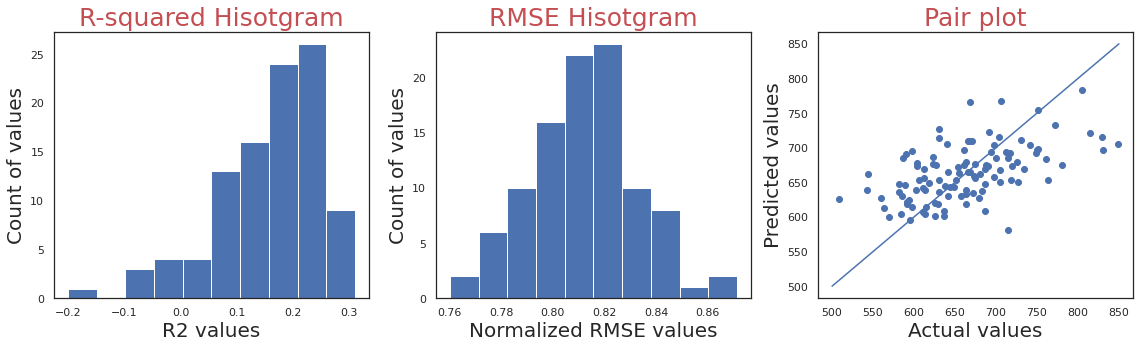

In [241]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols= 3, nrows= 1, figsize=(16,5))

best_rmse_point = np.argmin(mean_rmse_scores)


ax1.hist(mean_r2_scores)
ax1.set_title('R-squared Hisotgram',fontsize = 25, c='r')
ax1.set_xlabel('R2 values', fontsize = 20 )
ax1.set_ylabel('Count of values',fontsize = 20 )


std = df['Modulus of Rupture (PSI) (7 Days)'].std()
normalized_mean_rmse_scores = [x/std for x in mean_rmse_scores]
ax2.hist(normalized_mean_rmse_scores)
ax2.set_title('RMSE Hisotgram',fontsize = 25, c='r')
ax2.set_xlabel('Normalized RMSE values', fontsize = 20 )
ax2.set_ylabel('Count of values',fontsize = 20 )


from sklearn.model_selection import KFold
kf = KFold(n_splits=10, shuffle=True, random_state = best_rmse_point)

a = [500, 850]
plt.plot(a, a)

x = np.array(x)
for i,j in kf.split(x):
  x_train = x[i]
  y_train = y[i]
  x_test = x[j]
  y_test = y[j]

  #model = LinearRegression(normalize=False)
  #model = SVR(kernel='linear', C= 100)
  #model = DecisionTreeRegressor(criterion='mae' )
  #model = RandomForestRegressor(n_estimators=110, criterion='mae')
  model = GradientBoostingRegressor(n_estimators=10, loss = 'ls', learning_rate=0.2) 
  model.fit(x_train, y_train)
  plt.scatter(  y_test,model.predict(x_test), c='b')

ax3.set_title('Pair plot',fontsize = 25, c='r' )
ax3.set_xlabel('Actual values', fontsize = 20 )
ax3.set_ylabel('Predicted values',fontsize = 20 )

plt.tight_layout()
plt.show()

In [119]:
model

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mae',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=110, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [120]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size= 0.1, random_state = 20)

In [121]:
#model = LinearRegression(normalize=False)
#model = SVR(kernel='linear', C= 100)
#model = DecisionTreeRegressor(criterion='mae' )
model = RandomForestRegressor(n_estimators=110, criterion='mae')
model = GradientBoostingRegressor(n_estimators=10, loss = 'ls', learning_rate=0.2)

In [122]:
model.fit(x_train,y_train)
model.predict(x_test)

array([662.51835279, 663.31287914, 727.03964393, 661.41850907,
       795.98564604, 628.60786432, 738.95588491, 650.81147941,
       687.46708183, 649.35936982, 604.65989638])

In [123]:
model.score(x_test, y_test)

0.5727510479056139

In [124]:
print(y_test)

69     666
1      623
46     830
5      612
48     805
31     597
54     668
2      644
56     604
79     649
106    595
Name: Modulus of Rupture (PSI) (7 Days), dtype: int64


In [125]:
len(x_test)

11

In [126]:
#model = LinearRegression(normalize=False)
#model = SVR(kernel='linear', C= 100)
#model = DecisionTreeRegressor(criterion='mae' )
model = RandomForestRegressor(n_estimators=110, criterion='mae')
#model = SVR(C=90, kernel='linear' )


In [127]:
model.fit(x,y)
model.predict(x)

array([616.52727273, 626.63636364, 646.52727273, 619.18181818,
       659.24545455, 626.25454545, 658.48181818, 667.60909091,
       675.99090909, 671.50909091, 669.51818182, 669.2       ,
       742.86363636, 630.15454545, 741.27272727, 693.38181818,
       697.53636364, 662.66363636, 701.20909091, 686.75454545,
       644.7       , 691.81818182, 728.79090909, 697.93636364,
       704.76363636, 729.24545455, 763.43636364, 787.4       ,
       688.85454545, 794.39090909, 638.28181818, 604.74545455,
       628.52727273, 623.86363636, 600.31818182, 605.93636364,
       658.02272727, 646.2       , 661.58636364, 691.99090909,
       681.65454545, 644.91818182, 688.63636364, 607.97727273,
       709.31818182, 726.46363636, 778.60909091, 708.27272727,
       798.99090909, 738.15454545, 700.84545455, 715.71818182,
       704.39090909, 805.95454545, 703.92727273, 721.28181818,
       646.16363636, 676.53636364, 694.46363636, 678.93636364,
       666.        , 640.65454545, 685.78181818, 687.13

In [128]:
model.score(x,y)

0.8991886534414226

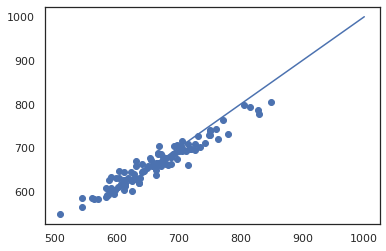

In [129]:
sns.set_style('white')
#a = [0.00000825,0.00001125]
a = [600, 1000]
plt.plot(a, a)
plt.scatter(y, model.predict(x))

In [130]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=10)

for i,j in kf.split(x):
  print(i,j)
  print()

[ 11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28
  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46
  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64
  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82
  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100
 101 102 103 104 105 106 107 108 109] [ 0  1  2  3  4  5  6  7  8  9 10]

[  0   1   2   3   4   5   6   7   8   9  10  22  23  24  25  26  27  28
  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46
  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64
  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82
  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100
 101 102 103 104 105 106 107 108 109] [11 12 13 14 15 16 17 18 19 20 21]

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  33  34  35  36  37  38  39  40 

-3.7424877548695745
-0.36007227341615167
0.025034028666747643
0.3351879512717204
-1.0157539512958258
-0.22775447969604912
0.1903435890272831
-1.0350798991194137
0.15453569109824417
-0.06800933690060895


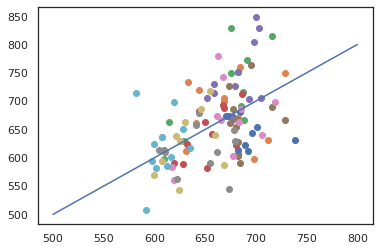

In [131]:
a = [500, 800]
plt.plot(a, a)

x = np.array(x)
for i,j in kf.split(x):
  x_train = x[i]
  y_train = y[i]
  x_test = x[j]
  y_test = y[j]

  #model = LinearRegression(normalize=False)
  #model = SVR(kernel='linear', C= 100)
  #model = DecisionTreeRegressor(criterion='mae' )
  model = RandomForestRegressor(n_estimators=110, criterion='mae')
  #model = SVR(C=90, kernel='linear' )

  model.fit(x_train, y_train)
  print(model.score(x_test, y_test))
  plt.scatter( model.predict(x_test), y_test)

In [132]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=10, shuffle=True)

for i,j in kf.split(x):
  print(i,j)
  print()

[  0   1   3   4   5   6   7   8   9  10  11  12  13  14  15  16  18  19
  21  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39
  40  41  42  43  44  45  47  48  50  52  53  54  55  56  57  58  60  61
  62  63  64  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80
  81  82  83  84  85  86  87  88  89  90  91  93  94  95  96  97  98 100
 101 102 103 104 105 106 107 108 109] [ 2 17 20 22 46 49 51 59 65 92 99]

[  0   1   2   3   4   5   6   7   8   9  10  11  13  14  15  16  17  18
  19  20  21  22  23  24  27  28  29  31  32  33  34  36  37  38  39  40
  41  42  44  45  46  47  49  50  51  52  53  54  55  56  57  58  59  60
  62  63  64  65  66  68  69  70  71  72  74  75  76  77  78  79  80  81
  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99
 100 101 102 103 104 105 106 107 108] [ 12  25  26  30  35  43  48  61  67  73 109]

[  0   1   2   3   4   5   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  

0.5515931058938031
0.7503448059963544
0.5747526345033623
0.1317517518956569
-1.8631729021238566
0.4076010818898701
0.5606090919901994
0.5347129220248176
0.5428382158162224
0.4256007323553881


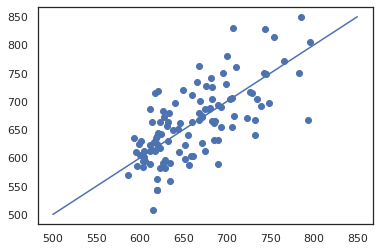

In [201]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=10, shuffle=True, random_state=86)

a = [500, 850]
plt.plot(a, a)

x = np.array(x)
for i,j in kf.split(x):
  x_train = x[i]
  y_train = y[i]
  x_test = x[j]
  y_test = y[j]

  model = LinearRegression(normalize=False)
  #model = SVR(kernel='linear', C= 100)
  #model = DecisionTreeRegressor(criterion='mae' )
  #model = RandomForestRegressor(n_estimators=30, criterion='mae')
  #model = SVR(C=90, kernel='linear' )

  model.fit(x_train, y_train)
  print(model.score(x_test, y_test))
  plt.scatter( model.predict(x_test), y_test, c='b')